### Zadania

Główna część listy (zadania 1-3) dotyczy detekcji krawędzi na obrazach. Zadanie 4 kontynuuje temat binaryzacji, skupiając się na operacjach globalnych (przekształceniach histogramu).

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym jaśniej (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

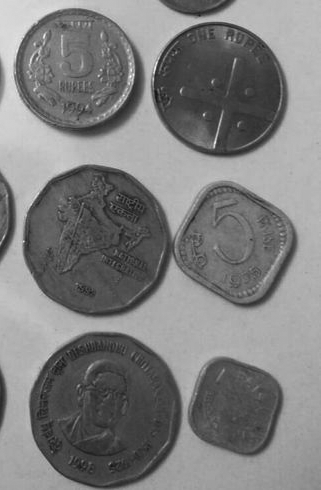

In [33]:
coins = cv2.imread('../data/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

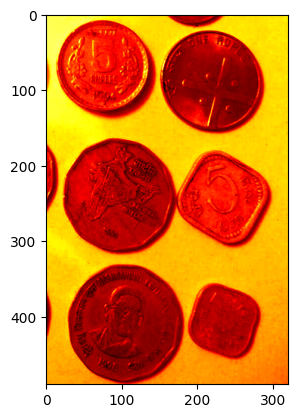

In [5]:
_ = plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

In [32]:
sobelx = cv2.Sobel(coins,cv2.CV_64F, dx=1, dy=0, ksize=5)  # dx, dy - derivative orders
sobely = cv2.Sobel(coins,cv2.CV_64F, dx=0,dy=1,ksize=5)
gradient_magnitude = np.linalg.norm(np.array((sobelx, sobely)), axis=0)

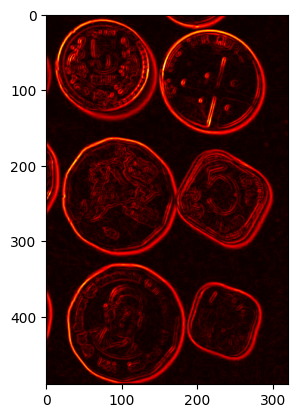

In [34]:
_ = plt.imshow(gradient_magnitude, cmap='hot')

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości **progów** oraz sposobu redukcji **szumu**.

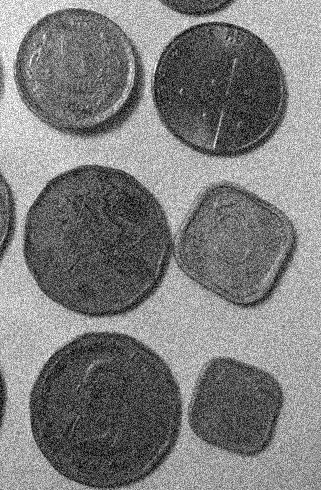

In [25]:
coins_noise = cv2.imread('../data/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

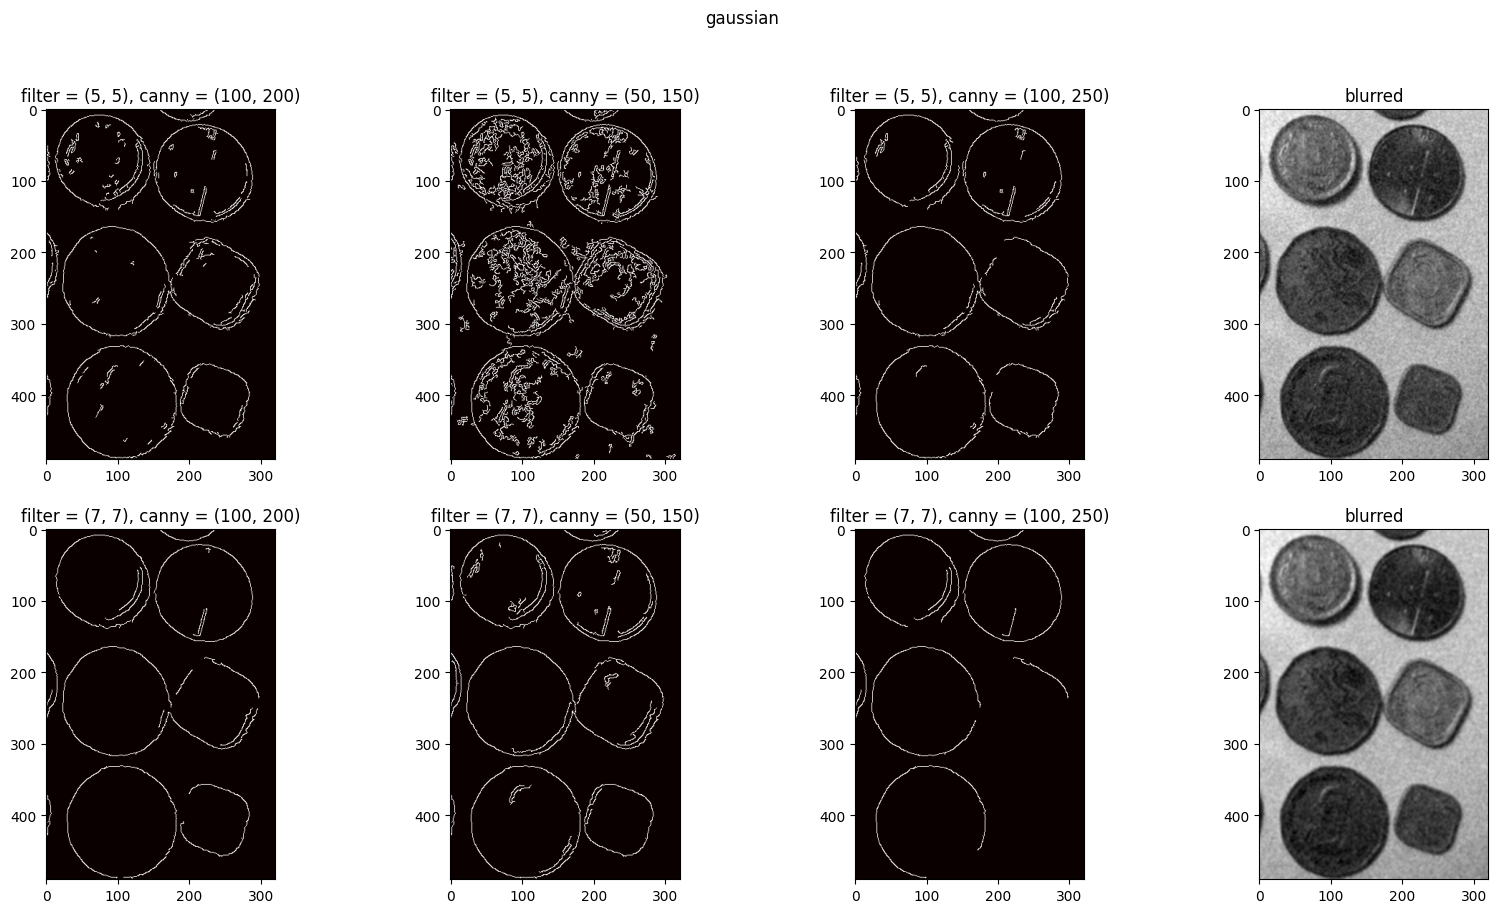

In [370]:
canny_parameters = [(100, 200), (50, 150), (100, 250)]
filter_parameters = [(5, 5), (7, 7)]

fig, axes = plt.subplots(len(filter_parameters), len(canny_parameters) + 1, figsize=(20, 10))

for j, filter_parameter_set in enumerate(filter_parameters):
    blurred = cv2.GaussianBlur(coins_noise, filter_parameter_set, 0)
    for i, parameter_set in enumerate(canny_parameters):
        axes[j, i].imshow(cv2.Canny(blurred, *parameter_set), cmap='hot')
        axes[j, i].set_title(f'filter = {filter_parameter_set}, canny = {parameter_set}')
    _ = axes[j, -1].imshow(blurred, cmap='gray')
    _ = axes[j, -1].set_title('blurred')
_ = plt.suptitle('gaussian')

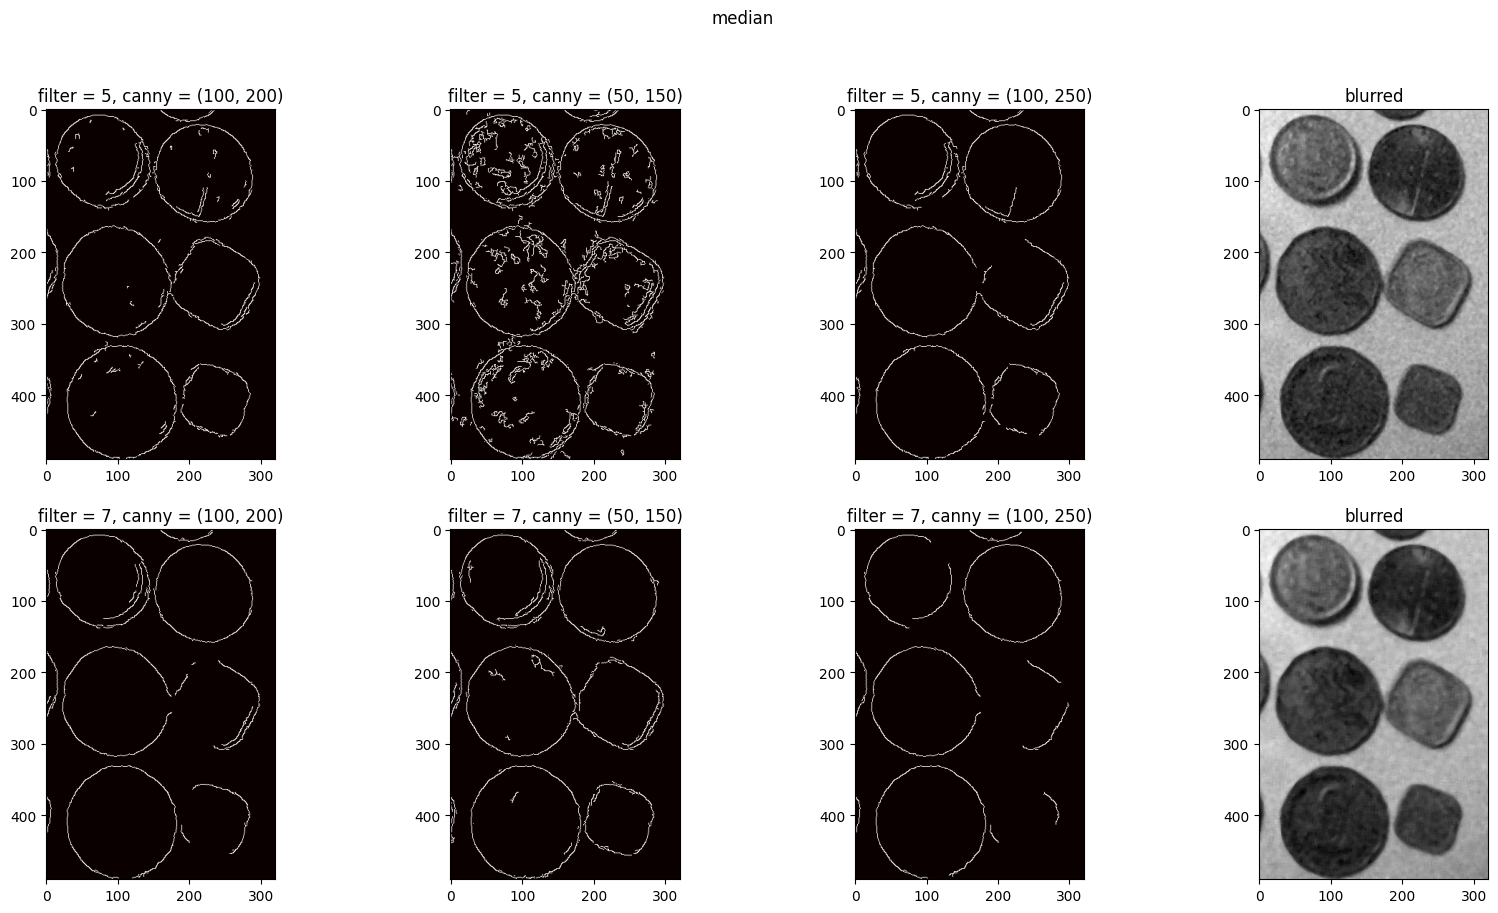

In [372]:
canny_parameters = [(100, 200), (50, 150), (100, 250)]
filter_parameters = [5, 7]

fig, axes = plt.subplots(len(filter_parameters), len(canny_parameters) + 1, figsize=(20, 10))

for j, filter_parameter_set in enumerate(filter_parameters):
    blurred = cv2.medianBlur(coins_noise, filter_parameter_set, 0)
    for i, parameter_set in enumerate(canny_parameters):
        axes[j, i].imshow(cv2.Canny(blurred, *parameter_set), cmap='hot')
        axes[j, i].set_title(f'filter = {filter_parameter_set}, canny = {parameter_set}')
    _ = axes[j, -1].imshow(blurred, cmap='gray')
    _ = axes[j, -1].set_title('blurred')
_ = plt.suptitle('median')

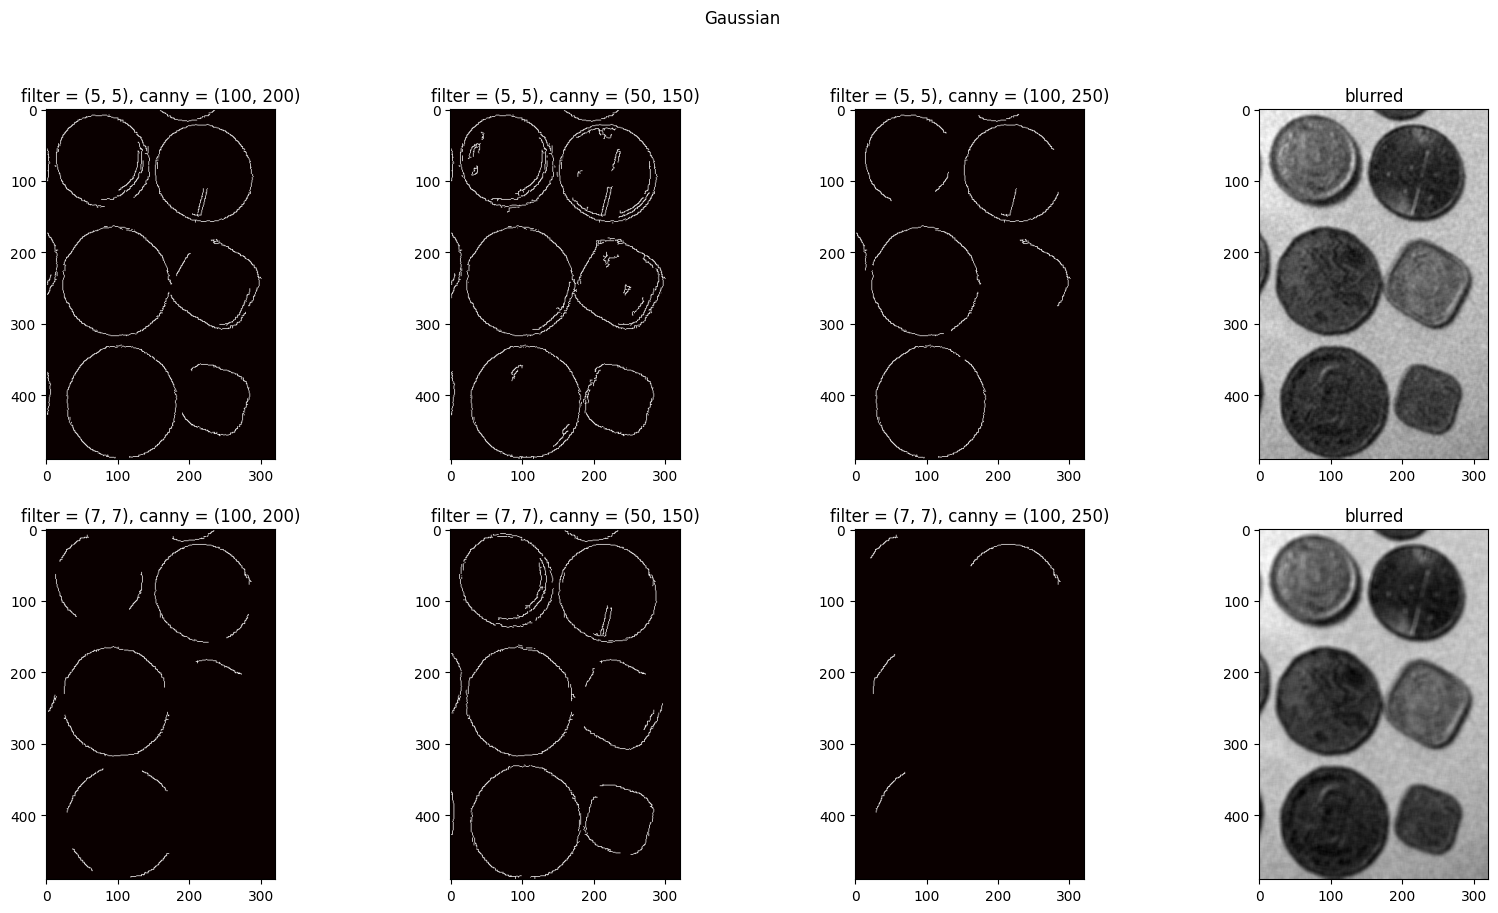

In [373]:
canny_parameters = [(100, 200), (50, 150), (100, 250)]
filter_parameters = [(5, 5), (7, 7)]

fig, axes = plt.subplots(len(filter_parameters), len(canny_parameters) + 1, figsize=(20, 10))

for j, filter_parameter_set in enumerate(filter_parameters):
    blurred = cv2.blur(coins_noise, filter_parameter_set)
    for i, parameter_set in enumerate(canny_parameters):
        axes[j, i].imshow(cv2.Canny(blurred, *parameter_set), cmap='hot')
        axes[j, i].set_title(f'filter = {filter_parameter_set}, canny = {parameter_set}')
    _ = axes[j, -1].imshow(blurred, cmap='gray')
    _ = axes[j, -1].set_title('blurred')
_ = plt.suptitle('Gaussian')

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Powtórz eksperyment z detekcją krawędzi (zad 2) dla wyrównanego obrazu i omów różnice.

In [375]:
coins_histogram, bins = np.histogram(coins_noise, bins=256, density=True)
coins_cdf = (coins_histogram.cumsum() * bins.max())
coins_equalized = coins_cdf[coins_noise].astype(np.uint8)

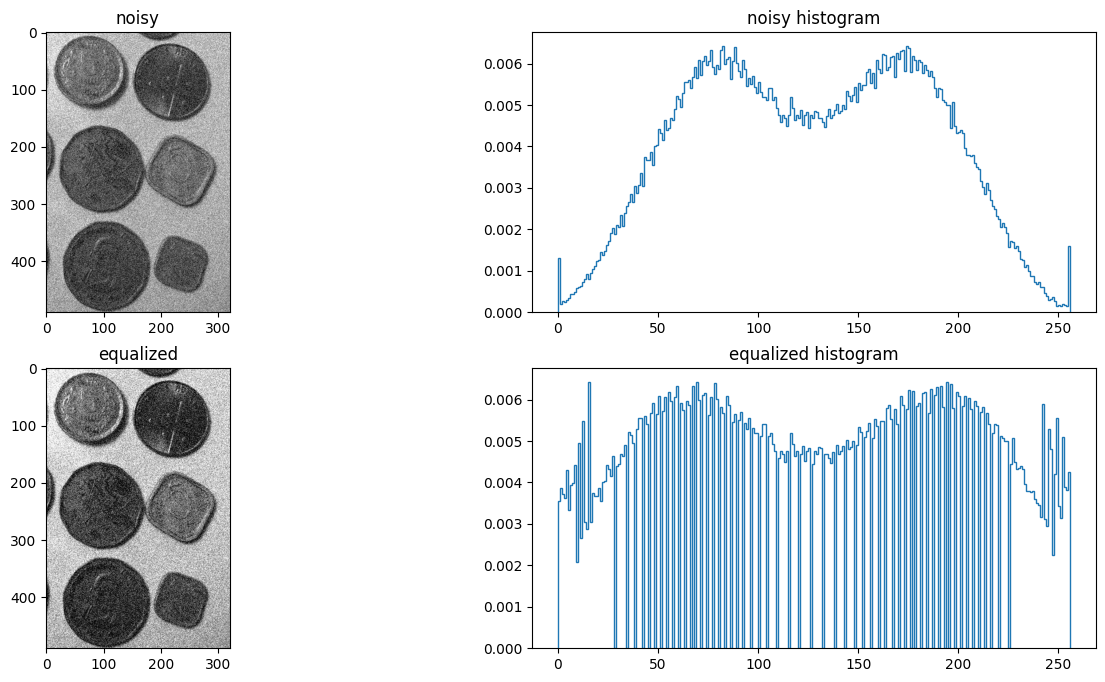

In [386]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
_ = ax1.imshow(coins_noise, cmap='gray')
_ = ax2.stairs(coins_histogram)
_ = ax1.set_title('noisy')
_ = ax2.set_title('noisy histogram')
_ = ax3.imshow(coins_equalized, cmap='gray')
_ = ax4.stairs(np.histogram(coins_equalized, bins=256, density=True)[0])
_ = ax3.set_title('equalized')
_ = ax4.set_title('equalized histogram')

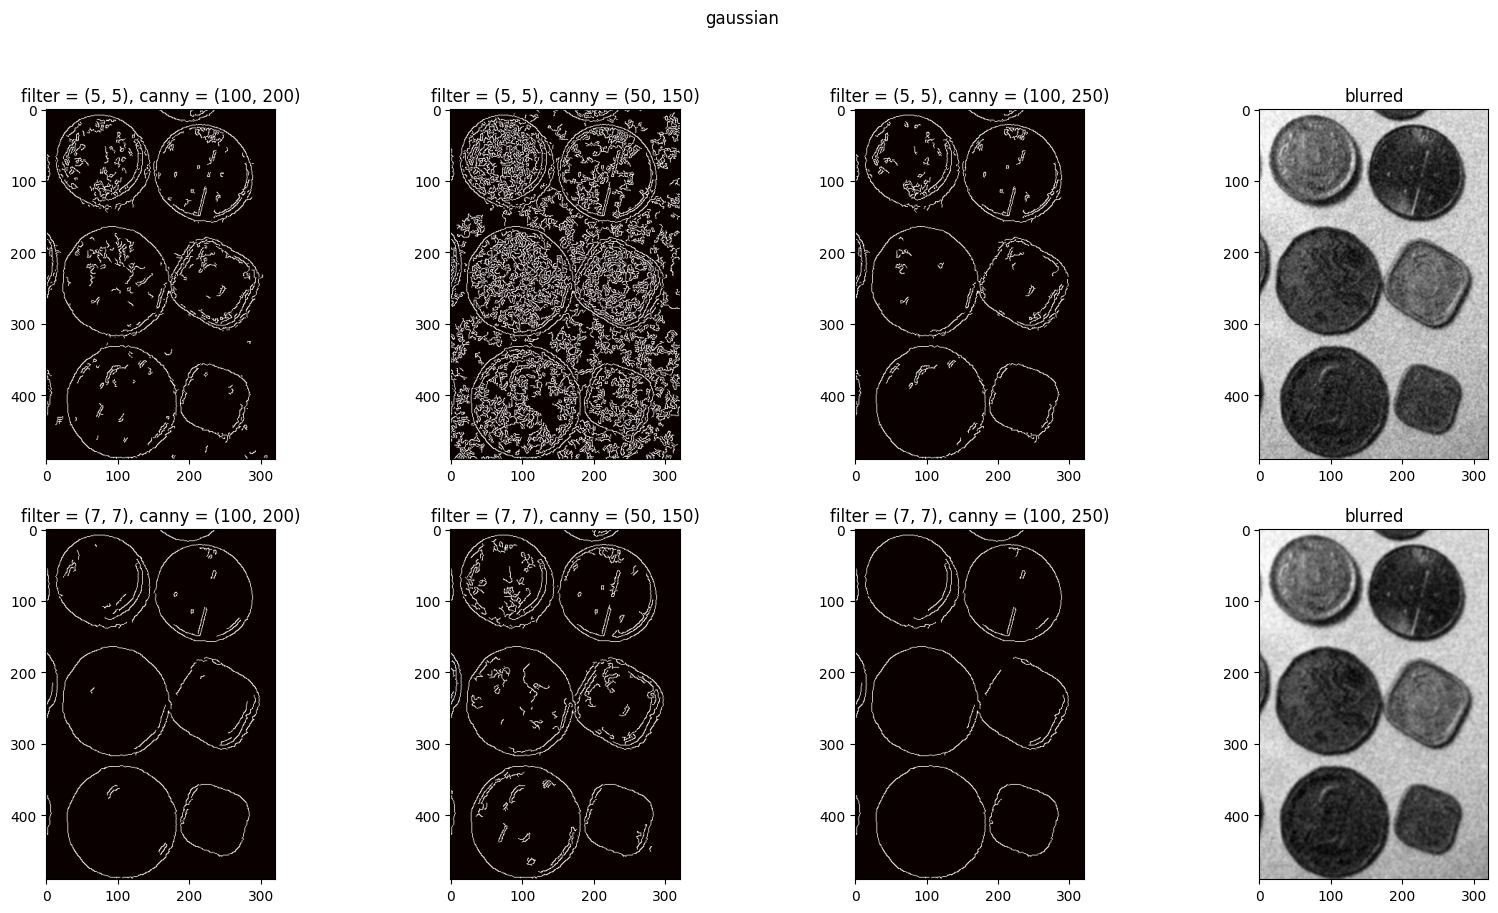

In [376]:
canny_parameters = [(100, 200), (50, 150), (100, 250)]
filter_parameters = [(5, 5), (7, 7)]

fig, axes = plt.subplots(len(filter_parameters), len(canny_parameters) + 1, figsize=(20, 10))

for j, filter_parameter_set in enumerate(filter_parameters):
    blurred = cv2.GaussianBlur(coins_equalized, filter_parameter_set, 0)
    for i, parameter_set in enumerate(canny_parameters):
        axes[j, i].imshow(cv2.Canny(blurred, *parameter_set), cmap='hot')
        axes[j, i].set_title(f'filter = {filter_parameter_set}, canny = {parameter_set}')
    _ = axes[j, -1].imshow(blurred, cmap='gray')
    _ = axes[j, -1].set_title('blurred')
_ = plt.suptitle('gaussian')

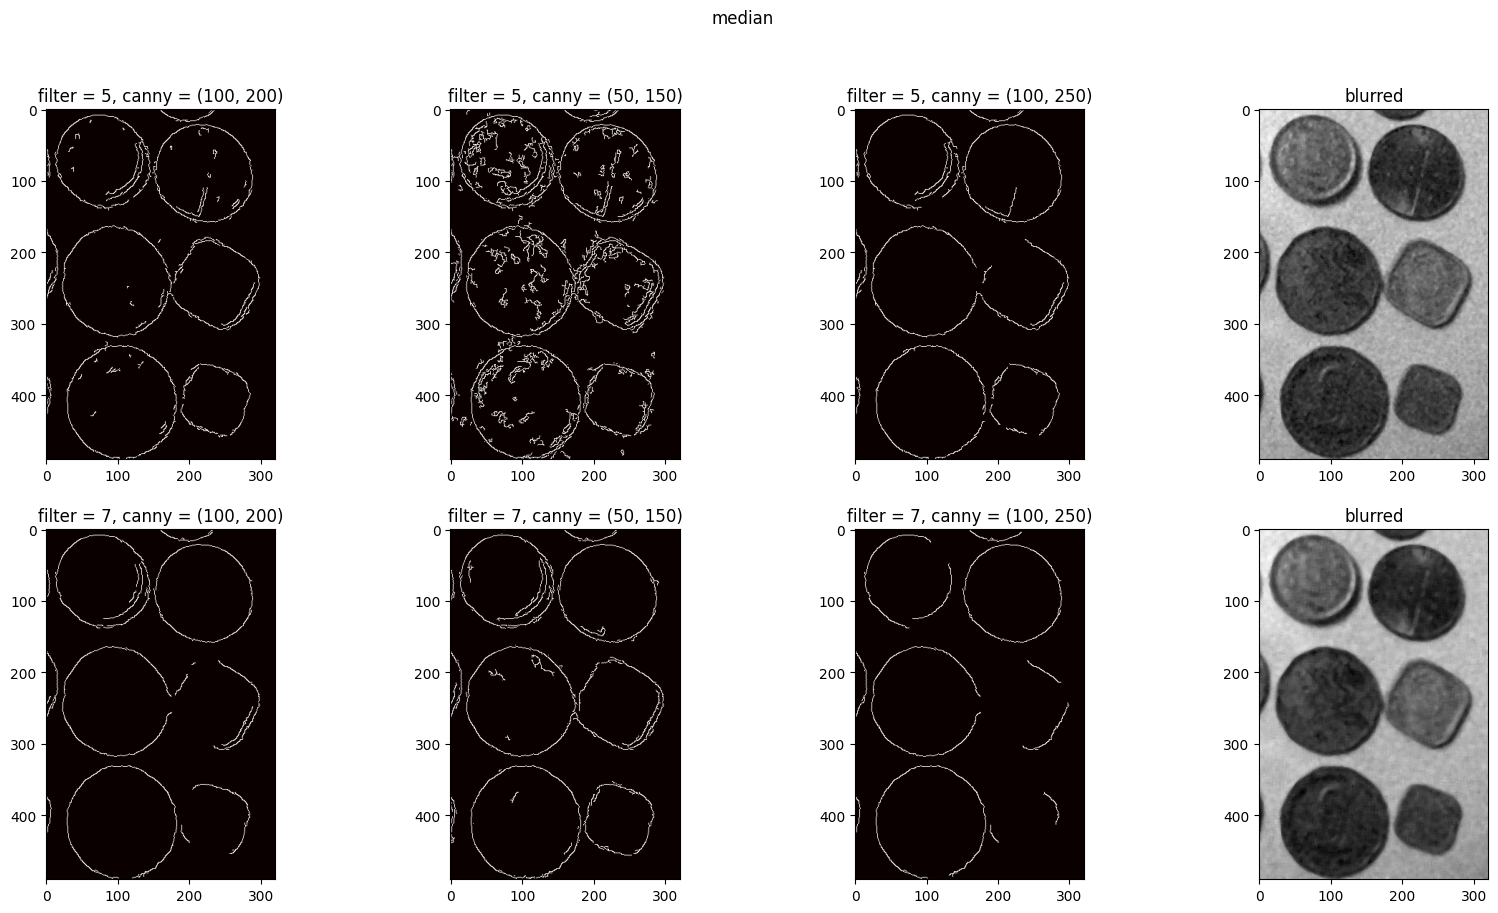

In [387]:
canny_parameters = [(100, 200), (50, 150), (100, 250)]
filter_parameters = [5, 7]

fig, axes = plt.subplots(len(filter_parameters), len(canny_parameters) + 1, figsize=(20, 10))

for j, filter_parameter_set in enumerate(filter_parameters):
    blurred = cv2.medianBlur(coins_noise, filter_parameter_set, 0)
    for i, parameter_set in enumerate(canny_parameters):
        axes[j, i].imshow(cv2.Canny(blurred, *parameter_set), cmap='hot')
        axes[j, i].set_title(f'filter = {filter_parameter_set}, canny = {parameter_set}')
    _ = axes[j, -1].imshow(blurred, cmap='gray')
    _ = axes[j, -1].set_title('blurred')
_ = plt.suptitle('median')

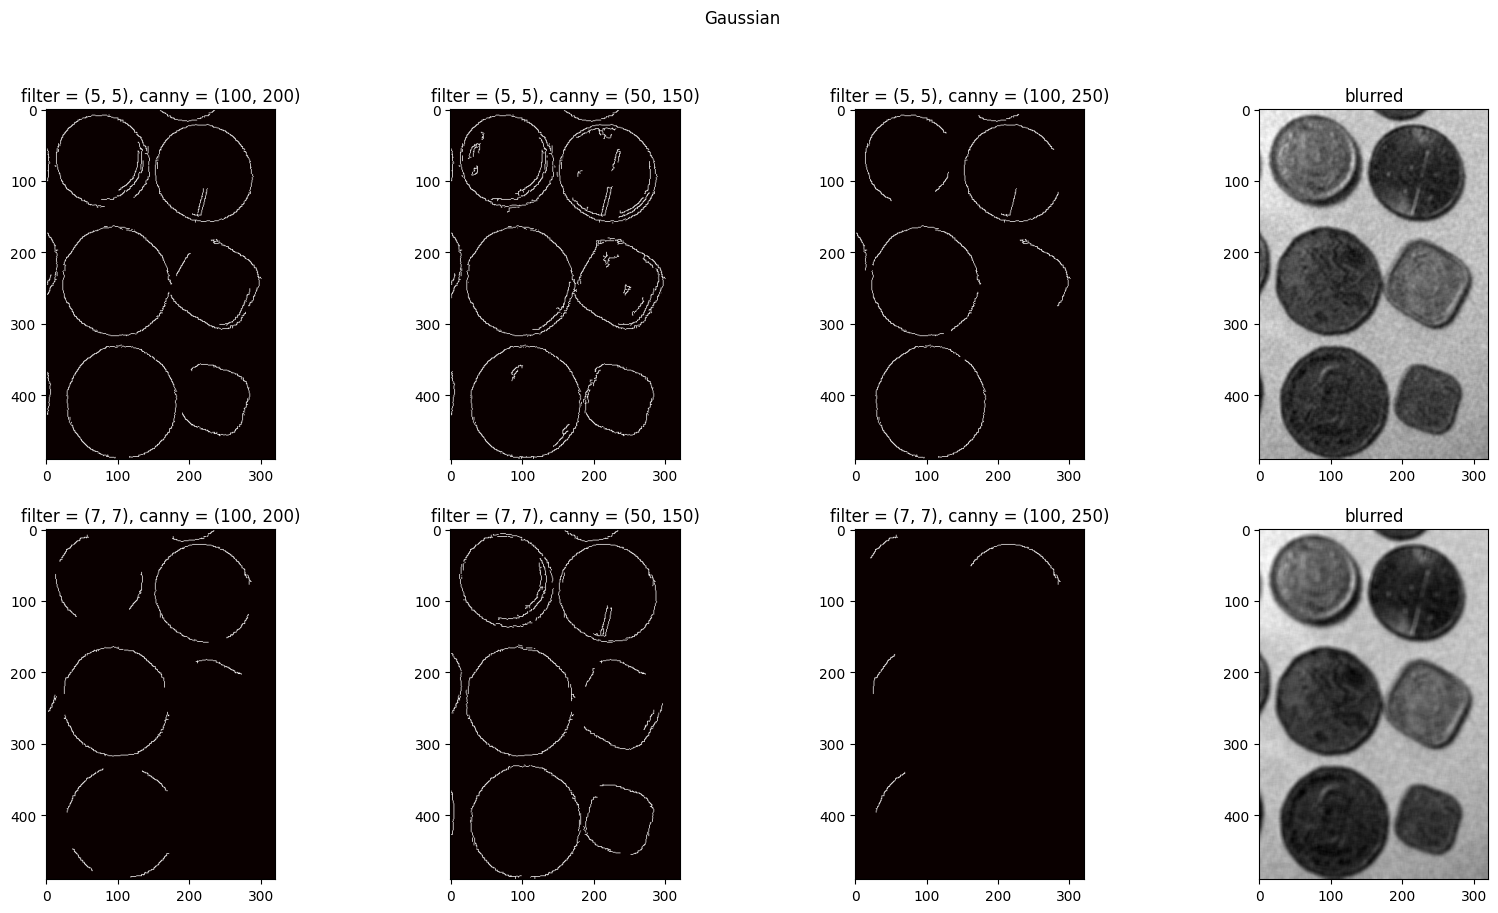

In [388]:
canny_parameters = [(100, 200), (50, 150), (100, 250)]
filter_parameters = [(5, 5), (7, 7)]

fig, axes = plt.subplots(len(filter_parameters), len(canny_parameters) + 1, figsize=(20, 10))

for j, filter_parameter_set in enumerate(filter_parameters):
    blurred = cv2.blur(coins_noise, filter_parameter_set)
    for i, parameter_set in enumerate(canny_parameters):
        axes[j, i].imshow(cv2.Canny(blurred, *parameter_set), cmap='hot')
        axes[j, i].set_title(f'filter = {filter_parameter_set}, canny = {parameter_set}')
    _ = axes[j, -1].imshow(blurred, cmap='gray')
    _ = axes[j, -1].set_title('blurred')
_ = plt.suptitle('Gaussian')

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazów `hare_gray` (od tego zacznij) i `hare_roi` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zbadaj wpływ kształtu rozkładu docelowego na zachowanie transformacji.  
Jaki(e) parametr(y) rozkładu są najistotniejsze?

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [`cv2.LUT`](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

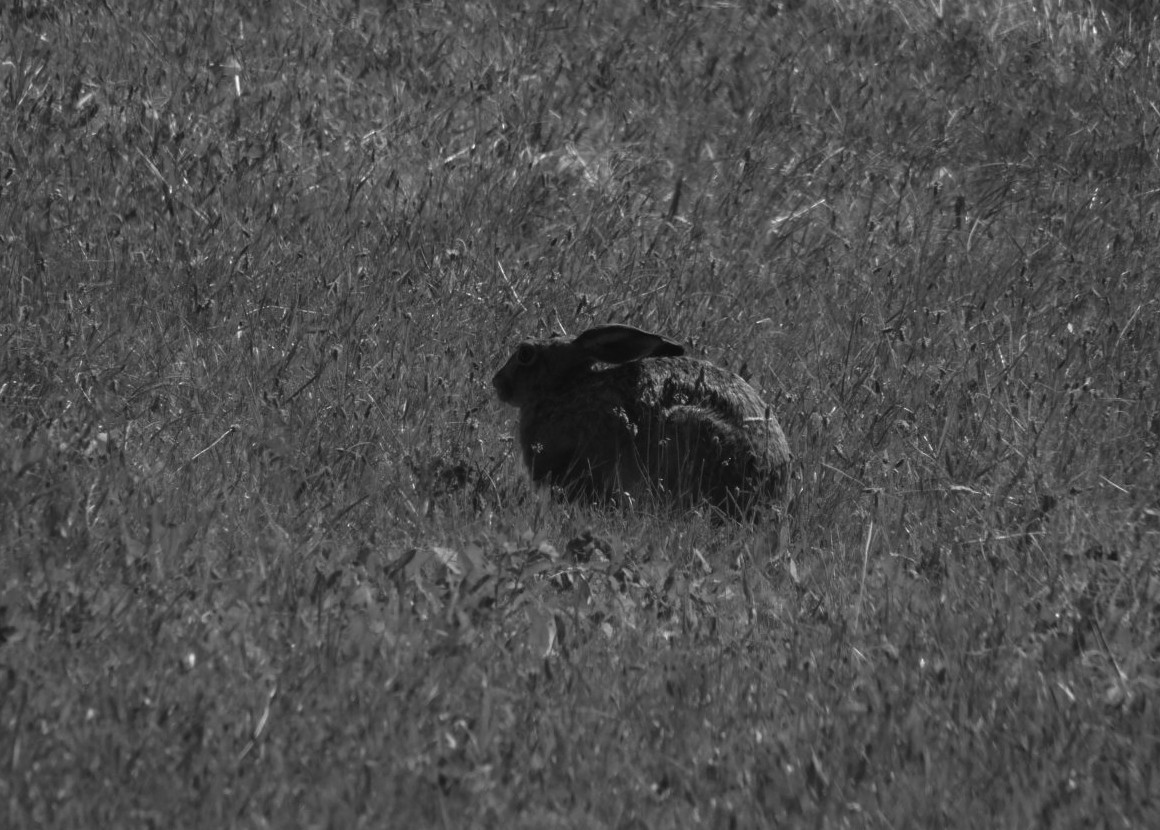

In [104]:
hare_gray = cv2.imread('../data/Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

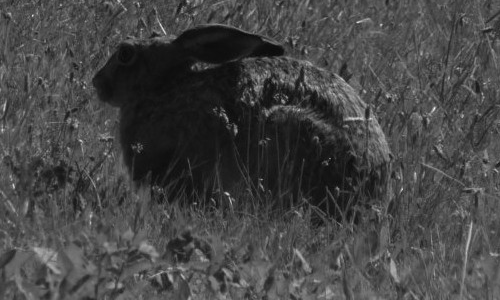

In [105]:
hare_roi = hare_gray[300:600, 400:900].copy()
Image.fromarray(hare_roi)

Rozwiązanie:

In [286]:
from utils.hare_experiment import run_hare_experiment

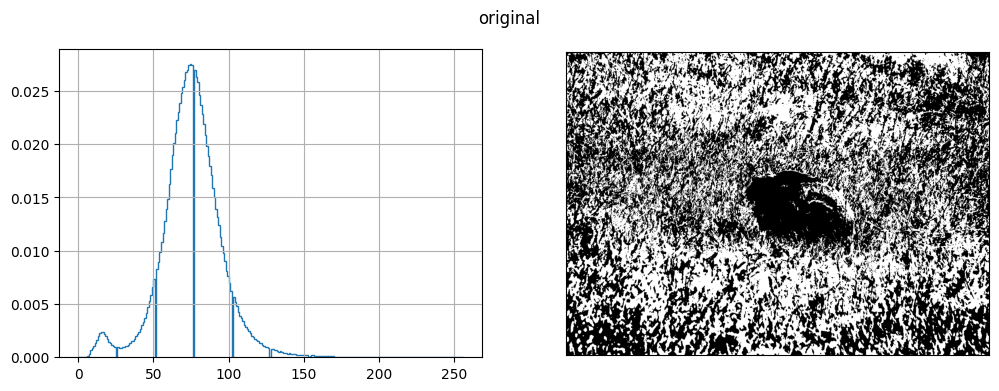

In [281]:
ret2,th2 = cv2.threshold(hare_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.stairs(np.histogram(hare_gray, bins=256, density=True)[0])
_ = ax1.grid(True)
_ = ax2.imshow(th2, cmap='gray')
_ = ax2.set_xticks([]); _ = ax2.set_yticks([])
_ = plt.suptitle('original')

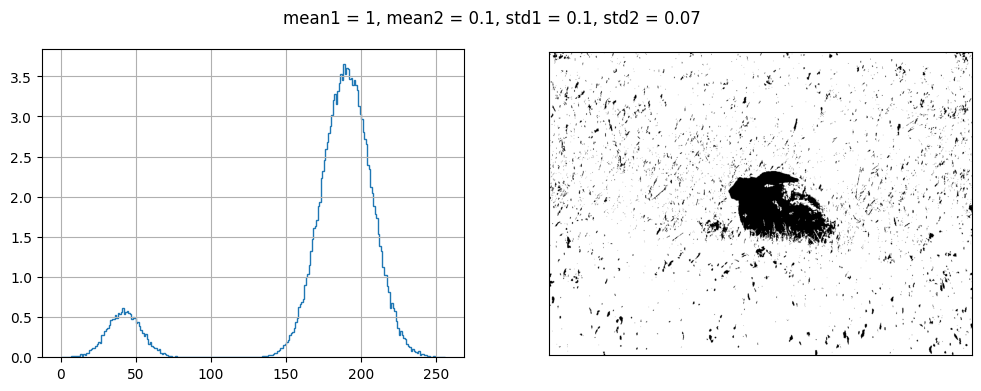

In [304]:
experiment = {'m1': 1, 'm2': 0.1, 'mu1': 0.1, 'mu2': 0.07, 'w1': 0.9, 'w2': 0.1}
source_hist, reference_hist, converted = run_hare_experiment(hare_gray, experiment).values()
ret2,th2 = cv2.threshold(converted, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.stairs(reference_hist)
_ = ax1.grid(True)
_ = ax2.imshow(th2, cmap='gray')
_ = ax2.set_xticks([]); _ = ax2.set_yticks([])
_ = plt.suptitle('mean1 = {}, mean2 = {}, std1 = {}, std2 = {}'.format(*experiment.values()))

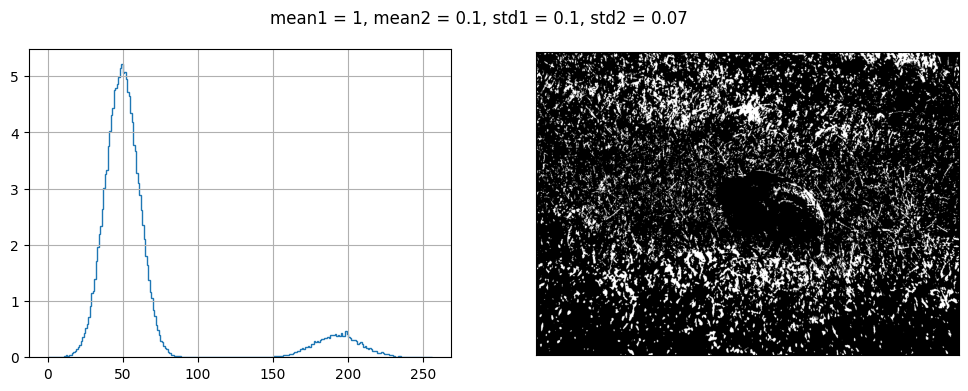

In [358]:
experiment = {'m1': 1, 'm2': 0.1, 'mu1': 0.1, 'mu2': 0.07, 'w1': 0.1, 'w2': 0.9}
source_hist, reference_hist, converted = run_hare_experiment(hare_gray, experiment).values()
ret2,th2 = cv2.threshold(converted, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.stairs(reference_hist)
_ = ax1.grid(True)
_ = ax2.imshow(th2, cmap='gray')
_ = ax2.set_xticks([]); _ = ax2.set_yticks([])
_ = plt.suptitle('mean1 = {}, mean2 = {}, std1 = {}, std2 = {}'.format(*experiment.values()))

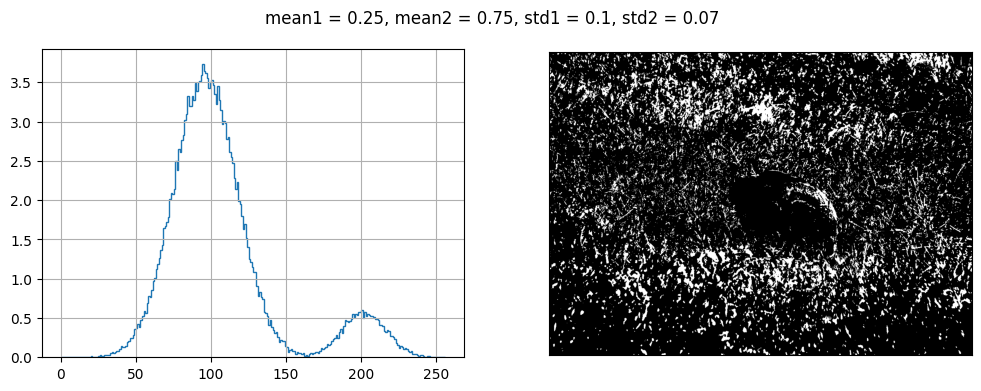

In [359]:
experiment = {'m1': 0.25, 'm2': 0.75, 'mu1': 0.1, 'mu2': 0.07, 'w1': 0.9, 'w2': 0.1}
source_hist, reference_hist, converted = run_hare_experiment(hare_gray, experiment).values()
ret2,th2 = cv2.threshold(converted, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.stairs(reference_hist)
_ = ax1.grid(True)
_ = ax2.imshow(th2, cmap='gray')
_ = ax2.set_xticks([]); _ = ax2.set_yticks([])
_ = plt.suptitle('mean1 = {}, mean2 = {}, std1 = {}, std2 = {}'.format(*experiment.values()))

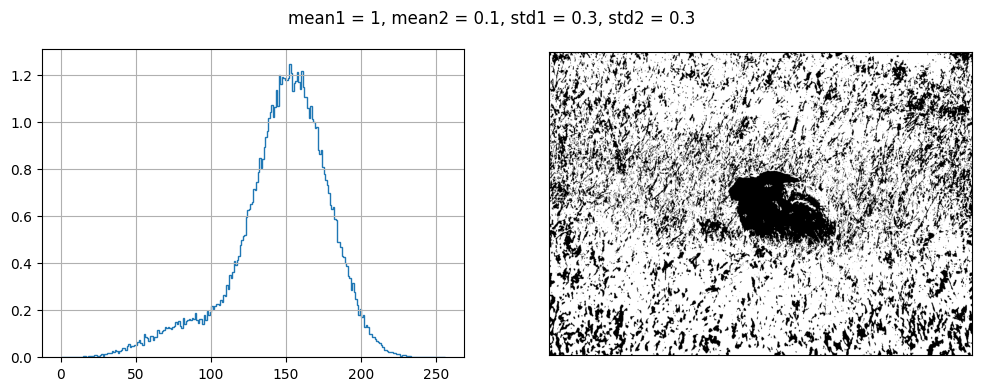

In [361]:
experiment = {'m1': 1, 'm2': 0.1, 'mu1': 0.3, 'mu2': 0.3, 'w1': 0.9, 'w2': 0.1}
source_hist, reference_hist, converted = run_hare_experiment(hare_gray, experiment).values()
ret2,th2 = cv2.threshold(converted, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.stairs(reference_hist)
_ = ax1.grid(True)
_ = ax2.imshow(th2, cmap='gray')
_ = ax2.set_xticks([]); _ = ax2.set_yticks([])
_ = plt.suptitle('mean1 = {}, mean2 = {}, std1 = {}, std2 = {}'.format(*experiment.values()))

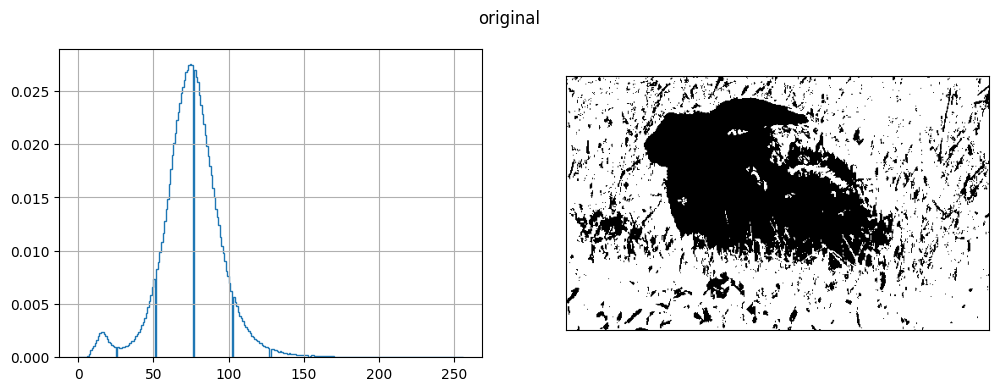

In [283]:
ret2,th2 = cv2.threshold(hare_roi, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.stairs(np.histogram(hare_gray, bins=256, density=True)[0])
_ = ax1.grid(True)
_ = ax2.imshow(th2, cmap='gray')
_ = ax2.set_xticks([]); _ = ax2.set_yticks([])
_ = plt.suptitle('original')

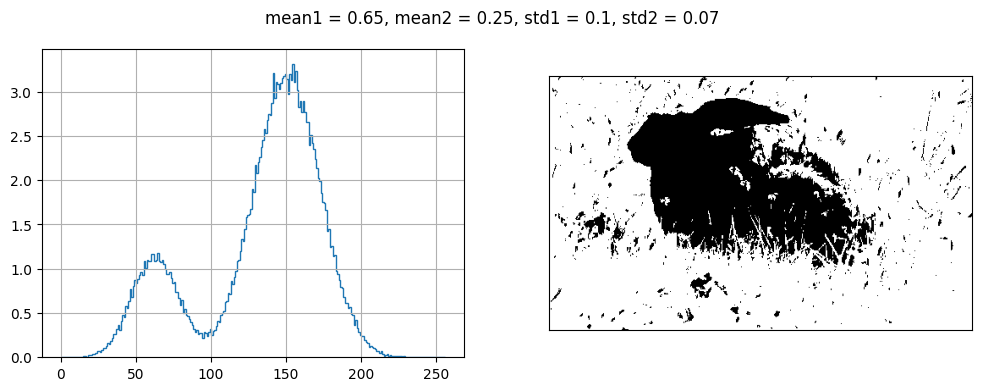

In [305]:
experiment = {'m1': 0.65, 'm2': 0.25, 'mu1': 0.1, 'mu2': 0.07, 'w1': 0.8, 'w2': 0.2}
source_hist, reference_hist, converted = run_hare_experiment(hare_roi, experiment).values()
ret2,th2 = cv2.threshold(converted, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.stairs(reference_hist)
_ = ax1.grid(True)
_ = ax2.imshow(th2, cmap='gray')
_ = ax2.set_xticks([]); _ = ax2.set_yticks([])
_ = plt.suptitle('mean1 = {}, mean2 = {}, std1 = {}, std2 = {}'.format(*experiment.values()))

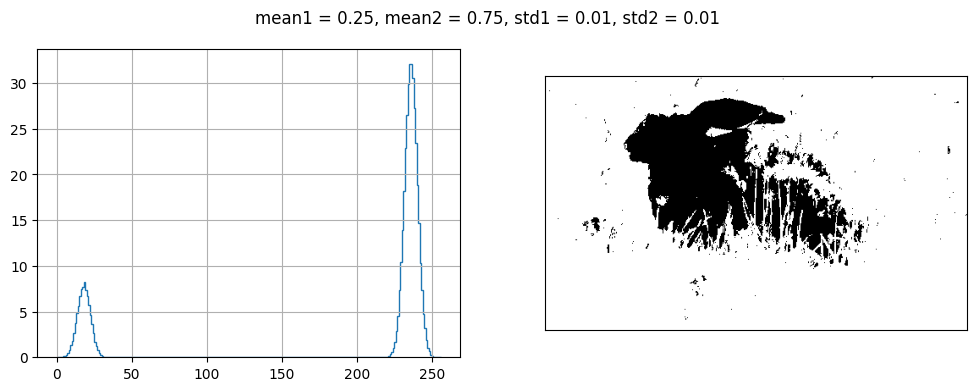

In [307]:
experiment = {'m1': 0.25, 'm2': 0.75, 'mu1': 0.01, 'mu2': 0.01, 'w1': 0.2, 'w2': 0.8}
source_hist, reference_hist, converted = run_hare_experiment(hare_roi, experiment).values()
ret2,th2 = cv2.threshold(converted, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.stairs(reference_hist)
_ = ax1.grid(True)
_ = ax2.imshow(th2, cmap='gray')
_ = ax2.set_xticks([]); _ = ax2.set_yticks([])
_ = plt.suptitle('mean1 = {}, mean2 = {}, std1 = {}, std2 = {}'.format(*experiment.values()))

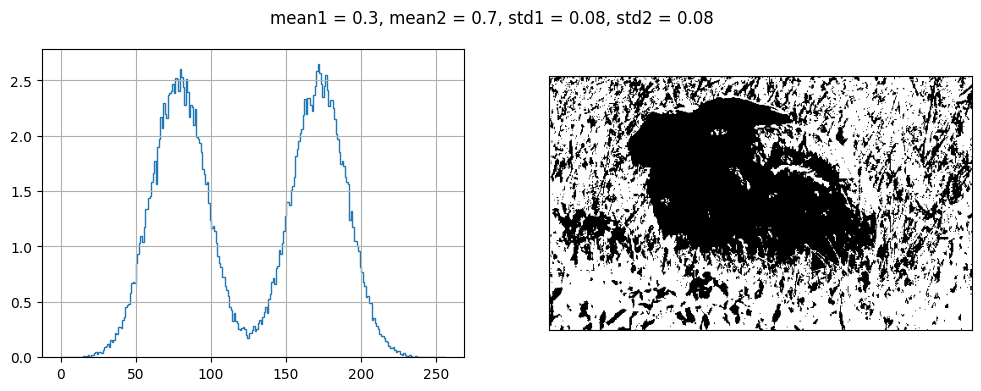

In [290]:
experiment = {'m1': 0.3, 'm2': 0.7, 'mu1': 0.08, 'mu2': 0.08}
source_hist, reference_hist, converted = run_hare_experiment(hare_roi, experiment).values()
ret2,th2 = cv2.threshold(converted, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.stairs(reference_hist)
_ = ax1.grid(True)
_ = ax2.imshow(th2, cmap='gray')
_ = ax2.set_xticks([]); _ = ax2.set_yticks([])
_ = plt.suptitle('mean1 = {}, mean2 = {}, std1 = {}, std2 = {}'.format(*experiment.values()))